### Загрузка данных и подготовка их к анализу  <a class="anchor" id="start"></a>

Импортируем необходимые для работы библиотеки и изучим данные с помощью методов info() и describe()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [2]:
display(visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Пропусков в данных нет; Данные в колонках End Ts, Start Ts имеют формат object, а должны иметь формат даты и времени. Нужно перевести их в правильный формат.

In [4]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

In [5]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [7]:
display(orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Пропусков в данных нет; надо перевести данные в колонке Buy Ts в формат даты и времени из формата object.

In [9]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


Видим, что средняя выручка 4,9 у.е.; максимальная - 2633 у.е.

In [12]:
display(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Пропусков в данных нет; надо перевести столбец "dt" в формат даты и времени из формата object

In [14]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период<a class="anchor" id="Dau"></a>

Нам нужно рассчитать метрики DAU (от англ. daily active users) — количество уникальных пользователей в день, WAU (от англ. weekly active users) — количество уникальных пользователей в неделю, MAU (от англ. monthly active users) — количество уникальных пользователей в месяц.

Будем использовать датасет visits, так как в нем есть данные о пользовательских сессиях. Добавим столбцы с разбивкой даты по полной дате, неделе и месяцу + создадим столбец с длительностью сессии в минутах:

In [16]:
visits['session_year']  = visits['Start Ts'].dt.year

In [17]:
visits['session_day'] = visits['Start Ts'].dt.date

In [18]:
visits['session_week'] = visits['Start Ts'].dt.week

In [19]:
visits['session_month'] = visits['Start Ts'].dt.month

In [20]:
visits['session_duration'] = visits['End Ts'] - visits['Start Ts']

In [21]:
visits

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_day,session_week,session_month,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-20,51,12,00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-19,8,2,00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,7,00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-20,20,5,00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-27,52,12,00:00:00
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,2017-07-29,30,7,00:00:19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,2018-01-25,4,1,00:00:19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,2018-03-03,9,3,00:00:19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,2017-11-02,44,11,00:00:19


### Расчет DAU

In [22]:
dau_total = visits.groupby('session_day').agg({'Uid': 'nunique'}).mean()

In [23]:
print(int(dau_total))

907


In [24]:
visits['visit_day'] = visits['Start Ts'].dt.date

(array([736481., 736511., 736542., 736573., 736603., 736634., 736664.,
        736695., 736726., 736754., 736785., 736815.]),
 <a list of 12 Text xticklabel objects>)

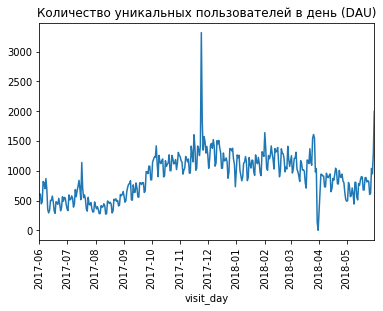

In [25]:
visits.groupby('visit_day')['Uid'].nunique().plot()
plt.title("Количество уникальных пользователей в день (DAU)")
plt.xticks(rotation=90)

Резкий всплеск количества пользователей в декабре 2017 года и резкое снижение числа пользователей в апреле 2018

907 уникальных пользователей в день пользуются сервисом.

### Расчет WAU

In [26]:
wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'Uid': 'nunique'})
    .mean()
)

In [27]:
print(int(wau_total)) 

5716


5716 уникальных пользователей в неделю пользуются сервисом.

In [28]:
visits['visit_week']=visits['Start Ts'].astype('datetime64[W]')

Text(0.5, 1.0, 'Количество уникальных пользователей в неделю (WAU)')

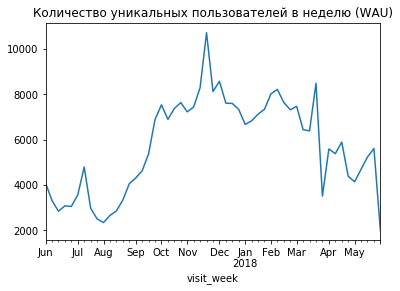

In [29]:
visits.groupby('visit_week')['Uid'].nunique().plot()
plt.title("Количество уникальных пользователей в неделю (WAU)")

Резкий всплеск количества пользователей в декабре 2017 года и резкое снижение числа пользователей в апреле 2018

### Расчет MAU

In [30]:
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'Uid': 'nunique'})
    .mean()
)

In [31]:
print(int(mau_total))

23228


23228 уникальных пользователей в месяц пользуются сервисом.

In [32]:
visits['visit_month'] = visits['Start Ts'].astype('datetime64[M]')

Text(0.5, 1.0, 'Количество уникальных пользователей в месяц (MAU)')

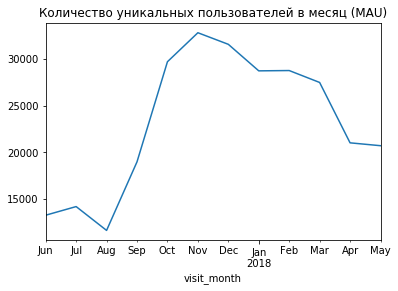

In [33]:
visits.groupby('visit_month')['Uid'].nunique().plot()
plt.title("Количество уникальных пользователей в месяц (MAU)")

После снижения резкого количества пользователей (время отпусков/ каникул у клиентов и отпусков у театров / музыкантов и тд?) в августе 2017 начинается рост, который достигает пика в октябре и потом следующего пика  - в ноябре 2018 (покупка билетов на новогодние мероприятия и мероприятия в новогодние праздники?, потом опять начинается падение с отдельными периодами роста в феврале и марте (покупка билетов на мероприятия в районе гендерных праздников?) и затем уверенный спад активности в апреле 2018. То есть, есть определенная сезонность в уровне активности пользователей.

### Продукт: Сколько сессий в день? Средний Retention Rate на второй месяц «жизни» когорт?<a class="anchor" id="retention_rate"></a>

Что бы узнать сколько сессий приходится на одного пользователя, разделим число сессий на количество пользователей за период:

In [34]:
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg(
    {'Uid': ['count', 'nunique']}
)

In [35]:
sessions_per_user.columns = ['n_sessions', 'n_users']

In [36]:
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)

In [37]:
print(sessions_per_user) 

                            n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539
             11                  43969    32797           1.340641
             12                  41983    31557           1.330386
2018         1                   36939    28716           1.286356
             2                   37182    28749           1.293332
             3                   35679    27473           1.298693
             4                   26515    21008           1.262138
             5                   26635    20701           1.286653


Видим, что в месяц один пользователь в среднем проводит в приложении максимум 1 сессию. Не сказать, что продукт используется регулярно.

### Продукт: Сколько длится одна сессия? <a class="anchor" id="session"></a>

Найдем среднюю продолжительность сессии - метрику ASL.Для этого посчитаем длину всех сессий и вычислим среднее:

In [38]:
visits['session_duration_sec'] = (
    visits['End Ts'] - visits['Start Ts']
).dt.seconds

In [39]:
print(visits['session_duration_sec'].mean()) 

643.506488592098


Получается, в среднем сессия длится 643 секунды или 10,7 минут.Проверим, какое распределение у средней продолжительности сессии.

Text(0.5, 1.0, 'Распределение средней продолжительности сессии')

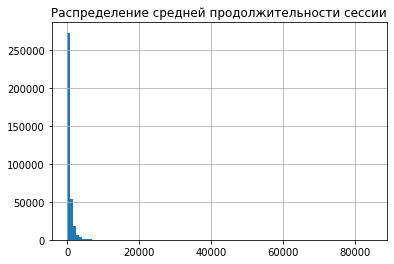

In [40]:
visits['session_duration_sec'].hist(bins=100) 
plt.title("Распределение средней продолжительности сессии")

In [41]:
print(visits['session_duration_sec'].mode())

0    60
dtype: int64


Длина сессий распределена неравномерно.

### Продукт: Как часто люди возвращаются?<a class="anchor" id="retention"></a>

Для этого сформируем когорты пользователей и рассчитаем метрику Retention Rate. 

Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность.

In [42]:
first_visit = visits.groupby(['Uid'])['Start Ts'].min().reset_index()

In [43]:
first_visit.columns = ['Uid', 'first_visit']

In [44]:
first_visit.head()

,Uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Присоединим first_visit к visits

In [45]:
visits = visits.merge(first_visit)

In [46]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_day,session_week,session_month,session_duration,visit_day,visit_week,visit_month,session_duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-20,51,12,00:18:00,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-19,8,2,00:28:00,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,7,00:00:00,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-20,20,5,00:24:00,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-09,10,3,00:28:00,2018-03-09,2018-03-08,2018-03-01,1680,2018-03-09 20:05:00


Переведем даты в подходящий нам формат

In [47]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')

In [48]:
visits['visit_month'] = visits['Start Ts'].astype('datetime64[M]')

In [49]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_day,session_week,session_month,session_duration,visit_day,visit_week,visit_month,session_duration_sec,first_visit,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-20,51,12,00:18:00,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-19,8,2,00:28:00,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19 16:53:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,7,00:00:00,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-20,20,5,00:24:00,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-09 20:05:00,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-09,10,3,00:28:00,2018-03-09,2018-03-08,2018-03-01,1680,2018-03-09 20:05:00,2018-03-01


In [50]:
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')

In [51]:
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [52]:
cohort_visits = visits.groupby(['first_visit_month', 'lifetime']).agg({'Uid': 'nunique'}).reset_index()

In [53]:
f_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'Uid']]

In [54]:
f_uid.columns = ['first_visit_month', 'f_uid']

In [55]:
f_uid.head()

,first_visit_month,f_uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Построим сводную таблицу и создадим тепловую карту

In [56]:
cohort_visits = cohort_visits.merge(f_uid)

In [57]:
cohort_visits['retention'] = cohort_visits['Uid'] / cohort_visits['f_uid']

In [58]:
visits_retention_pivot = cohort_visits.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention', aggfunc = 'sum')

In [59]:
visits_retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Найдем средний Retention Rate на второй месяц «жизни» когорт

In [60]:
display(visits_retention_pivot.mean() * 100)

lifetime
0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

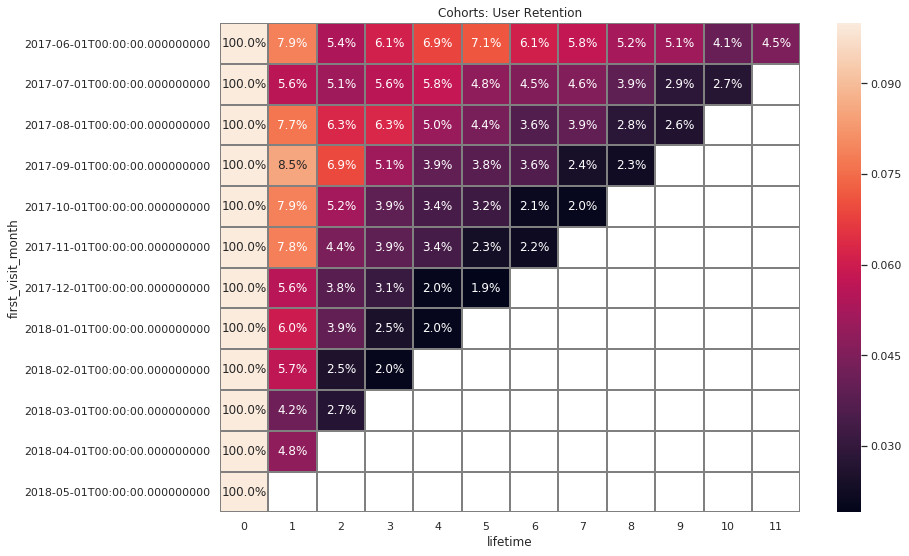

In [61]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(visits_retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1); 

Видим на тепловой карте, что люди возвращаются, но их заметно меньше, по сравнению с нулевым месяцем: из 100% нулевого месяца в первом вернулись от 4,2% до 8,5% пользователей, а к концу года во всех когортах возвращается все меньше и меньше пользователей. Возможно, были выбраны неэффективные источники трафика или пользователи не сочли интересными мероприятия, размещенные на Яндекс.Афише и не вернулись на сайт снова.

Выводы по блоку:

Мы рассчитали несколько продуктовых метрик: показатели пользовательской активности – DAU, WAU, MAU; количество и длительность пользовательских сессий и Retention Rate. 

Сайт Яндекс.Афиши посещают 907 уникальных пользователей в день, 5 716 уникальных пользователей в неделю, 23 228 уникальных пользователей в месяц.

После снижения количества пользователей в августе 2017 начинается рост, который достигает пика в октябре и потом следующего пика  - в ноябре 2018 (покупка билетов на новогодние мероприятия и мероприятия в новогодние праздники?, потом опять начинается падение с отдельными периодами роста в феврале и марте (покупка билетов на мероприятия в районе гендерных праздников?) и затем уверенный спад активности в апреле 2018. То есть, есть определенная сезонность в уровне активности пользователей.

В месяц один пользователь в среднем проводит в приложении максимум 1 сессию. Не сказать, что продукт используется регулярно. Пользовательская сессия длится в среднем 10,7 минут.

Что касается Retention Rate, то люди возвращаются, но их заметно меньше, чем в нулевой месяц "жизни" когорты: из 100% нулевого месяца в первом вернулись от 4,2% до 8,5% пользователей, а к концу года во всех когортах возвращается все меньше и меньше пользователей. Причина этого может быть в неверно выбранных источниках рекламы или неактуальности контента Яндекс.Афиши для пользователей.

### Метрики электронной коммерции<a class="anchor" id="ecommerce"></a>

### Продажи: Когда люди начинают покупать?<a class="anchor" id="beginbuy"></a>

Для вычислений нам понадобятся датафреймы visits и orders. Сделаем группировку, что бы найти дату первого заказа и дату первой сессии и добавим колонки с датой и месяцем первого заказа.

In [62]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [63]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_day,session_week,session_month,session_duration,visit_day,visit_week,visit_month,session_duration_sec,first_visit,first_visit_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-20,51,12,00:18:00,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-19,8,2,00:28:00,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,7,00:00:00,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-20,20,5,00:24:00,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-09,10,3,00:28:00,2018-03-09,2018-03-08,2018-03-01,1680,2018-03-09 20:05:00,2018-03-01,0


In [64]:
first_visit = visits.groupby('Uid').agg({'Start Ts':'min'})\
                .rename(columns={'Start Ts':'first_visit_date'})\
                .reset_index()

In [65]:
first_visit.head()

,Uid,first_visit_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [66]:
first_order = orders.groupby('Uid').agg({'Buy Ts':'min'})\
                .reset_index()

In [67]:
buying_time = first_visit.merge(first_order, on='Uid', how='inner')

In [68]:
buying_time.head()

,Uid,first_visit_date,Buy Ts
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [69]:
buying_time['buying_time'] = (buying_time['Buy Ts'] - buying_time['first_visit_date']).dt.seconds / 60

In [70]:
buying_time.head()

,Uid,first_visit_date,Buy Ts,buying_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


Посмотрим основные характеристики данных в этом датафрейме

In [71]:
buying_time['buying_time'].describe()

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: buying_time, dtype: float64

Из таблицы видим, что в среднем между первым визитом и покупкой проходит 249 минут, медианное значение - 16 минут. То есть покупка происходит быстро и, видимо, она планировалась. Заход на сайт был целенаправленным.

In [72]:
buying_time[buying_time['buying_time'] == 0].count()

Uid                 2467
first_visit_date    2467
Buy Ts              2467
buying_time         2467
dtype: int64

Построим график для отображения времени между первым визитом и покупкой

Text(0.5, 1.0, 'Время в минутах от первого визита до покупки')

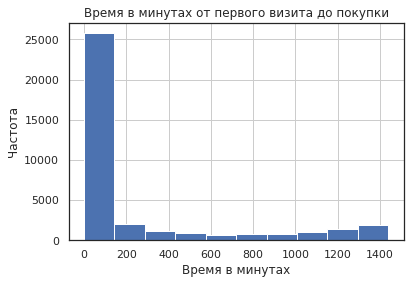

In [73]:
ax = buying_time['buying_time'].hist()
ax.set_xlabel('Время в минутах')
ax.set_ylabel('Частота')
ax.set_title('Время в минутах от первого визита до покупки')

### Продажи: Сколько раз покупают за период?<a class="anchor" id="period_buy"></a>

Для удобства расчетов этого показателя объединим датафреймы orders и visits

In [74]:
orders_and_visits = orders.merge(first_visit)

In [75]:
orders_and_visits.head()

,Buy Ts,Revenue,Uid,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


Выделим из датафрейма в отдельные столбцы данные по дате, неделе и месяцу

In [76]:
orders_and_visits['purchase_date'] = orders_and_visits['Buy Ts'].dt.date

In [77]:
orders_and_visits['purchases_week'] = orders_and_visits['Buy Ts'].dt.week

In [78]:
orders_and_visits['purchase_month'] = orders_and_visits['Buy Ts'].dt.month

In [79]:
orders_and_visits['purchase_year'] = orders_and_visits['Buy Ts'].dt.year

In [80]:
orders_and_visits

,Buy Ts,Revenue,Uid,first_visit_date,purchase_date,purchases_week,purchase_month,purchase_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01,22,6,2017
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31,22,5,2018
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31,22,5,2018
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31,22,5,2018
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2018-05-31,22,5,2018


Удалим строку с датой покупки за июнь 2018 года, чтобы не искажать график

In [81]:
orders_and_visits = orders_and_visits.drop(np.where(orders_and_visits['Buy Ts'] == '2018-06-01 00:02:00')[0])

In [82]:
orders_and_visits

,Buy Ts,Revenue,Uid,first_visit_date,purchase_date,purchases_week,purchase_month,purchase_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01,22,6,2017
...,...,...,...,...,...,...,...,...
50409,2018-05-31 23:43:00,3.67,1805512004303848280,2017-12-07 23:20:00,2018-05-31,22,5,2018
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31,22,5,2018
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31,22,5,2018
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31,22,5,2018


Сгруппируем данные по покупкам за день, неделю и месяц

In [83]:
purchases_per_day = orders_and_visits.groupby('purchase_date')['Uid'].count()

In [84]:
purchases_per_week = orders_and_visits.groupby(['purchases_week'])['Uid'].count()

In [85]:
purchases_per_month = orders_and_visits.groupby(['purchase_month', 'purchase_year']).agg({'Uid': 'count'})

In [86]:
purchases_per_month

,,Uid
purchase_month,purchase_year,
1,2018,4721
2,2018,5281
3,2018,5326
4,2018,3273
5,2018,4346
6,2017,2354
7,2017,2363
8,2017,1807
9,2017,3387


In [87]:
str_purchases_per_month = purchases_per_month.sort_values(by='purchase_year')

In [88]:
str_purchases_per_month

,,Uid
purchase_month,purchase_year,
6,2017,2354
7,2017,2363
8,2017,1807
9,2017,3387
10,2017,5679
11,2017,5659
12,2017,6218
1,2018,4721
2,2018,5281


Создадим отдельный датафрейм с агрегированными значениями по покупкам

In [89]:
orders_count = pd.DataFrame()

In [90]:
orders_count['per_day'] = purchases_per_day.describe()

In [91]:
orders_count['per_week'] = purchases_per_week.describe()

In [92]:
orders_count['per_month'] = purchases_per_month.describe()

In [93]:
orders_count.head(8)

,per_day,per_week,per_month
count,363.000000,52.000000,12.000000
mean,138.881543,969.500000,4201.166667
std,76.623567,397.602546,1511.972092
min,15.000000,314.000000,1807.000000
25%,83.000000,658.500000,3045.500000
50%,136.000000,997.500000,4533.500000
75%,177.000000,1270.500000,5409.250000
max,814.000000,1894.000000,6218.000000


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text xticklabel objects>)

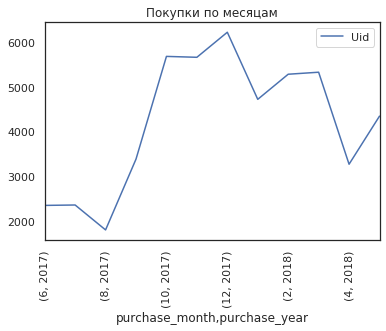

In [94]:
str_purchases_per_month.plot()
plt.title("Покупки по месяцам")
plt.xticks(rotation=90)

На помесячном графике покупок заметна сезонность: 
    самое большое количество покупок было в декабре (перед Новым годом), так же пики были в марте(потом резкое падение к апрелю), в мае (и затем резкий спад в августе) и рост в сентябре, закончившийся пиком в октябре. Майский пик продаж можно объяснить наличием свободного времени в период длинных майских праздников и большим количеством мероприятий в это время. Рост в сентябре-октябре - открытием нового сезона, например, в театрах и возвращением людей и деятелей искусства(например) из отпусков.

Видим из таблицы, что в среднем в день совершается 138 покупок, в неделю - 969, в месяц - 4200.

### Продажи: Какой средний чек?<a class="anchor" id="mean_bill"></a>

Чтобы найти величину среднего чека, нам надо разделить общую сумму покупки на общее число покупок

Для начала посмотрим описательные статистики столбца 'Revenue'

In [95]:
orders_and_visits['Revenue'].describe()

count    50414.000000
mean         4.999678
std         21.818574
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

Среднее значение - 4.99, максимальное - 2633

Найдем моду - она равна 1,8.

In [96]:
orders_and_visits['Revenue'].mode()

0    1.83
dtype: float64

In [97]:
orders_and_visits.head()

,Buy Ts,Revenue,Uid,first_visit_date,purchase_date,purchases_week,purchase_month,purchase_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01,22,6,2017


In [98]:
mean_purchase_by_month = orders_and_visits.groupby(['purchase_month', 'purchase_year']).agg({'Revenue': 'mean'})

In [99]:
mean_purchase_by_month.head(12)

,,Revenue
purchase_month,purchase_year,
1,2018,4.112927
2,2018,4.840095
3,2018,5.413930
4,2018,5.150645
5,2018,4.771279
6,2017,4.060106
7,2017,5.306589
8,2017,4.847139
9,2017,5.416448


In [100]:
str_mean_purchase_by_month = mean_purchase_by_month.sort_values(by='purchase_year')

In [101]:
str_mean_purchase_by_month

,,Revenue
purchase_month,purchase_year,
6,2017,4.060106
7,2017,5.306589
8,2017,4.847139
9,2017,5.416448
10,2017,4.928280
11,2017,4.783518
12,2017,5.852139
1,2018,4.112927
2,2018,4.840095


Средний чек - от 4,1 до 5,8. Самый большой средний чек - в декабре 2017.

Отразим разброс на графике

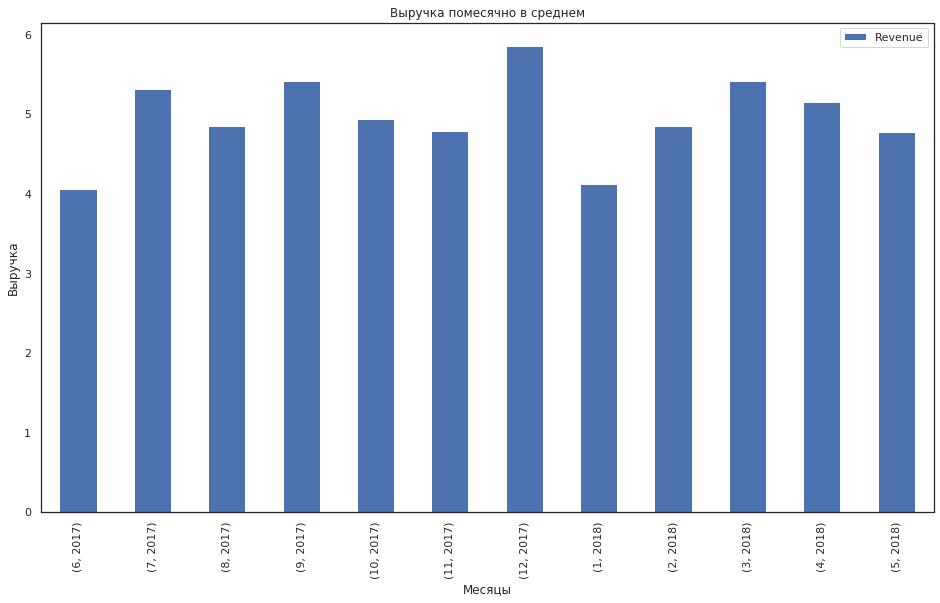

In [102]:
ax = str_mean_purchase_by_month.plot(kind='bar', figsize=(16, 9))
plt.title('Выручка помесячно в среднем')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Выручка')
plt.show()

### Продажи: Сколько денег приносят? (LTV)<a class="anchor" id="ltv_money"></a>

LTV удобно считать по когортам. Для этого нужно: найти дату первой покупки каждого покупателя; вычислить число новых покупателей за каждую дату; добавить дату первой покупки в таблицу с заказами; сгруппировать таблицу и посчитать выручку.

Удобнее всего сформировать месячные когорты. Выделим месяцы из дат в таблицах с заказами и расходами

In [103]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [104]:
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

Получим месяц первой покупки каждого покупателя

In [105]:
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()

In [106]:
first_orders.columns = ['Uid', 'first_order_month']

In [107]:
first_orders.head()

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц

In [108]:
cohort_sizes = (first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index())

In [109]:
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [110]:
print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами

In [111]:
orders_new = pd.merge(orders,first_orders, on='Uid')

In [112]:
print(orders_new.head()) 

               Buy Ts  Revenue                   Uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  
3        2017-06-01  
4        2017-06-01  


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index()

In [113]:
cohorts = (orders_new.groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index())

In [114]:
print(cohorts.head()) 

  first_order_month order_month  Revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58


Видим построчно, сколько выручки суммарно принесла каждая когорта

In [115]:
report_new = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [116]:
report_new

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей. Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц

In [117]:
print(report_new.head()) 

  first_order_month  n_buyers order_month  Revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58


Вычислим возраст когорт

In [118]:
report_new['age'] = (
    (report_new['order_month'] - report_new['first_order_month']) / np.timedelta64(1, 'M')
).round().astype('int')

In [119]:
print(report_new.head()) 

  first_order_month  n_buyers order_month  Revenue  age
0        2017-06-01      2023  2017-06-01  9557.49    0
1        2017-06-01      2023  2017-07-01   981.82    1
2        2017-06-01      2023  2017-08-01   885.34    2
3        2017-06-01      2023  2017-09-01  1931.30    3
4        2017-06-01      2023  2017-10-01  2068.58    4


In [120]:
report_new['ltv'] = report_new.Revenue / report_new.n_buyers

In [121]:
report_new

,first_order_month,n_buyers,order_month,Revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


Построим сводную таблицу LTV

In [122]:
ltv = report_new.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

ltv.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


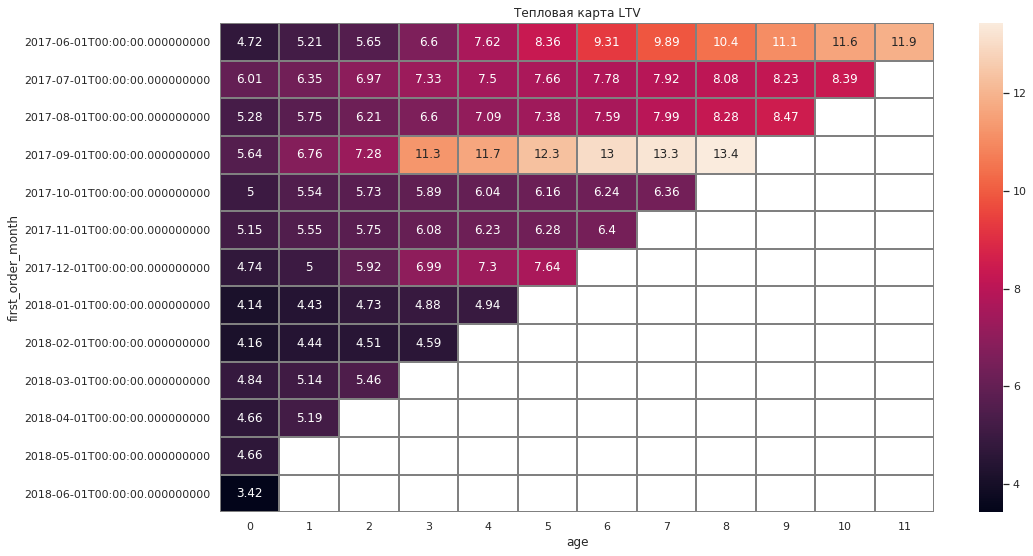

In [123]:
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Тепловая карта LTV')
sns.heatmap(ltv, annot=True, fmt ='.3g', linewidths=1, linecolor='gray'); 

Интересно, что сентябрьская когорта к 4-му месяцу "жизни" начала приносить в 2 раза больше доходов, чем в свои первые месяцы "жизни" и также вдвое больше чем "ранние" когорты, например, июньская когорта увеличила доход только к 7-му месяцу "жизни" 

Рассчитаем средний LTV по когортам за 6 месяцев

In [124]:
ltv[5].mean()

7.969052630207336

средний LTV по когортам за 6 месяцев - 7.969 у.е.

### Маркетинговые метрики<a class="anchor" id="market_metrics"></a>

### Маркетинг: Сколько денег потратили? Всего / на каждый источник / по времени<a class="anchor" id="resource"></a>

Найдем сначала из датафрейма costs общую сумму расходов 

In [125]:
costs['costs'].sum()

329131.62

In [126]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Общая сумма расходов - 329131.62 у.е.

Сгруппируем расходы по источникам трафика

In [127]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

In [128]:
costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Затраты по источникам распределяются в течение года неравномерно: они увеличиваются в октябре-ноябре-декабре и заметно снижаются по сравнению с этими значениями к апрелю (примерно на треть по каждому источнику). А  также сами источники неоднородны по финансированию: затраты между ними отличаются более, чем в 20 раз (например, источник №3 и источник №10). Но даже увеличение затрат на источник №10 вдвое в период новогодних праздников, конечно, не выводит его к величине затрат на источник №3 (самый затратный из источников)

In [129]:
costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Создадим колонку 'in_percents', в которой доли каждого источника в общей сумме расходов 

In [130]:
costs_by_source['in_percents'] = costs_by_source['costs'] / 329131.62 * 100

In [131]:
costs_by_source['in_percents']

0     6.329769
1    13.005751
2    42.937725
3    18.555981
4    15.725350
5     1.676378
6     1.769046
Name: in_percents, dtype: float64

In [132]:
costs_by_source.sort_values('in_percents', ascending = False)

,source_id,costs,in_percents
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
1,2,42806.04,13.005751
0,1,20833.27,6.329769
6,10,5822.49,1.769046
5,9,5517.49,1.676378


Самая большая доля расходов приходится на источник №3, примерно одинаковый вклад (13-18%) - у источников №№4,5,2; самая маленькая доля расходов приходится на источники №№10,9 (1,76-1,67%)

Создадим столбец 'costs_month'

In [133]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date

Сгруппируем расходы по каждому месяцу

In [134]:
costs_by_month = costs.groupby('costs_month')['costs'].sum().reset_index()

In [135]:
costs_by_month

,costs_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Сводная по динамике затрат на источники по месяцам

In [136]:
costs.pivot_table(index='source_id', columns='costs_month', aggfunc='sum')

costs                                                         \
costs_month 2017-06-01 2017-07-01 2017-08-01 2017-09-01 2017-10-01 2017-11-01   
source_id                                                                       
1              1125.61    1072.88     951.81    1502.01    2315.75    2445.16   
2              2427.38    2333.11    1811.05    2985.66    4845.00    5247.68   
3              7731.65    7674.37    6143.54    9963.55   15737.24   17025.34   
4              3514.80    3529.73    3217.36    5192.26    6420.84    5388.82   
5              2616.12    2998.14    2185.28    3849.14    5767.40    6325.34   
9               285.22     302.54     248.93     415.62     609.41     683.18   
10              314.22     329.82     232.57     460.67     627.24     792.36   

                                                                               
costs_month 2017-12-01 2018-01-01 2018-02-01 2018-03-01 2018-04-01 2018-05-01  
source_id                                                                      
1              2341.20    2186.18    2204.48    1893.09    1327.49    1467.61  
2              4897.80    4157.74    4474.34    3943.14    2993.70    2689.44  
3             16219.52   14808.78   14228.56   13080.85    9296.81    9411.42  
4              7680.47    5832.79    5711.96    5961.87    4408.49    4214.21  
5              5872.52    5371.52    5071.31    4529.62    3501.15    3669.56  
9               657.98     547.16     551.50     480.29     373.49     362.17  
10              645.86     614.35     480.88     526.41     388.25     409.86

Из таблицы видим, что самые большие расходы были в декабре, а самые низкие - в августе

Создадим график расходов по месяцам

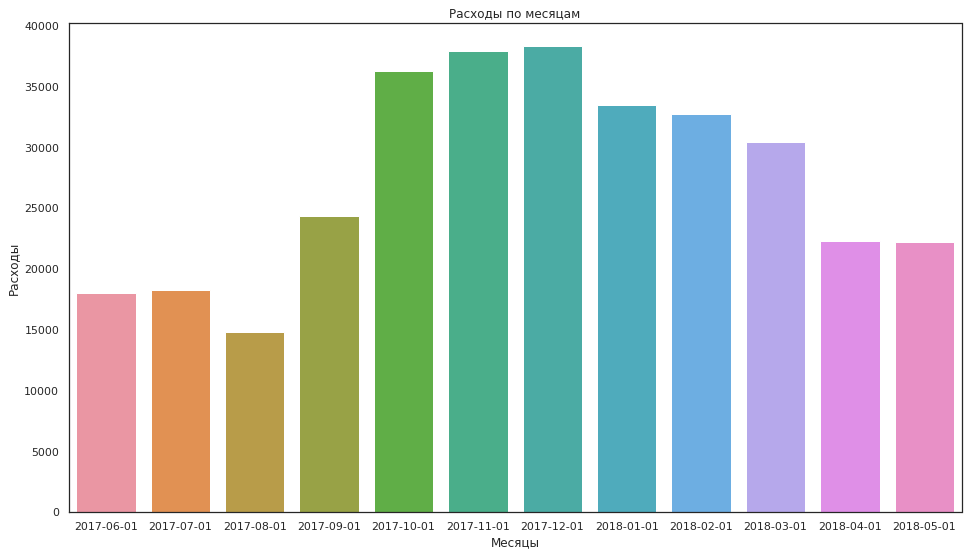

In [137]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="costs_month", y="costs", data=costs_by_month)
plt.title('Расходы по месяцам')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Расходы')
plt.show()

### Маркетинг: Сколько стоило привлечение одного покупателя из каждого источника? (САС)<a class="anchor" id="cac_resource"></a>

CAC (от англ. customer acquisition cost) — стоимость привлечения клиента. Сумма денег, во сколько обходится новый клиент компании. Экономика одного покупателя сходится, если LTV больше CAC.

Будем работать с датафреймом costs

In [138]:
costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [139]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

In [140]:
costs_months = costs.groupby('costs_month')['costs'].sum().reset_index()

In [141]:
costs_months.head()

,costs_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [142]:
report_new1 = pd.merge(cohort_sizes, costs_months, left_on='first_order_month', right_on='costs_month')

In [143]:
report_new1.head()

,first_order_month,n_buyers,costs_month,costs
0,2017-06-01,2023,2017-06-01,18015.00
1,2017-07-01,1923,2017-07-01,18240.59
2,2017-08-01,1370,2017-08-01,14790.54
3,2017-09-01,2581,2017-09-01,24368.91
4,2017-10-01,4340,2017-10-01,36322.88


Стоимость привлечения одного покупателя

In [144]:
report_new1['cac'] = report_new1.costs / report_new1.n_buyers

In [145]:
report_new1.head(12)

,first_order_month,n_buyers,costs_month,costs,cac
0,2017-06-01,2023,2017-06-01,18015.00,8.905091
1,2017-07-01,1923,2017-07-01,18240.59,9.485486
2,2017-08-01,1370,2017-08-01,14790.54,10.796015
3,2017-09-01,2581,2017-09-01,24368.91,9.441654
4,2017-10-01,4340,2017-10-01,36322.88,8.369327
5,2017-11-01,4081,2017-11-01,37907.88,9.288870
6,2017-12-01,4383,2017-12-01,38315.35,8.741809
7,2018-01-01,3373,2018-01-01,33518.52,9.937302
8,2018-02-01,3651,2018-02-01,32723.03,8.962758
9,2018-03-01,3533,2018-03-01,30415.27,8.608907


Расходы на привлечение покупателей в августовской когорте оказались самыми высокими - 10,7; самые "дешевые" - из майской когорты.

Видим величину САС на одного покупателя по каждой когорте. 

In [146]:
report_new1.mean()

n_buyers     3043.500000
costs       27427.635000
cac             9.147357
dtype: float64

Средний САС на одного покупателя для всего проекта - 9,14. 

Построим график CAC

Text(0.5, 1.0, 'Расходы на привлечение покупателей по месяцам')

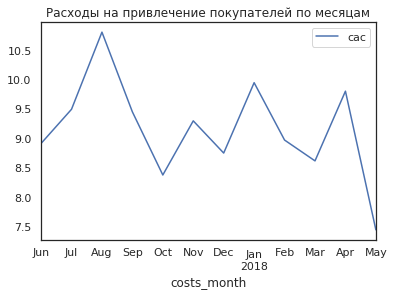

In [147]:
report_new1.plot(x='costs_month', y='cac')
plt.title("Расходы на привлечение покупателей по месяцам")

На графике видим "дорогих" покупателей в августе и "очень недорогих" - в октябре. Но стоимость трафика не всегда коррелирует с "качеством" привлеченных покупателей

Расчет среднего CAC на одного покупателя для каждого источника трафика

Время первой покупки

In [148]:
first_orders1 = orders.groupby('Uid').agg({'Buy Ts': 'min'}).reset_index()

In [149]:
first_orders1.columns = ['uid', 'first_order_ts1']

In [150]:
first_orders1['first_order_dt'] = first_orders1['first_order_ts1'].dt.date

In [151]:
first_orders1['first_order_month'] = first_orders1['first_order_ts1'].astype('datetime64[M]')

In [152]:
first_orders1.head(5)

,uid,first_order_ts1,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01


Дата первой сессии для покупателя

In [153]:
first_visits1 = visits.groupby('Uid').agg({'Start Ts': 'min'}).reset_index()

In [154]:
first_visits1.columns = ['uid', 'first_session_start1']

In [155]:
first_visits1.head(5)

,uid,first_session_start1
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [156]:
first_visits1['first_session_dt'] = first_visits1['first_session_start1'].dt.date

In [157]:
first_visits1['first_session_month'] = first_visits1['first_session_start1'].astype('datetime64[M]')

In [158]:
first_visits1.head(5)

,uid,first_session_start1,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [159]:
buyers = pd.merge(first_visits1, first_orders1, on ='uid')

In [160]:
buyers.head(5)

,uid,first_session_start1,first_session_dt,first_session_month,first_order_ts1,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [161]:
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])

In [162]:
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

In [163]:
buyers.columns = 'Uid','first_session_start1','first_session_dt', 'first_session_month', 'first_order_ts1', 'first_order_dt', 'first_order_month'

In [164]:
buyers

,Uid,first_session_start1,first_session_dt,first_session_month,first_order_ts1,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01


Рассчитаем САС для каждого источника трафика. Найдем первый рекламный источник, из которого пришел каждый пользователь

In [165]:
df_users = visits.sort_values('Start Ts').groupby('Uid').first()

In [166]:
df_users

,Device,End Ts,Source Id,Start Ts,session_year,session_day,session_week,session_month,session_duration,visit_day,visit_week,visit_month,session_duration_sec,first_visit,first_visit_month,lifetime
Uid,,,,,,,,,,,,,,,,
11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018,2018-03-01,9,3,00:06:00,2018-03-01,2018-03-01,2018-03-01,360,2018-03-01 17:27:00,2018-03-01,0
49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018,2018-02-06,6,2,00:02:00,2018-02-06,2018-02-01,2018-02-01,120,2018-02-06 15:55:00,2018-02-01,0
297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017,2017-06-07,23,6,00:01:00,2017-06-07,2017-06-01,2017-06-01,60,2017-06-07 18:47:00,2017-06-01,0
313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,2017-09-18,38,9,00:18:00,2017-09-18,2017-09-14,2017-09-01,1080,2017-09-18 22:49:00,2017-09-01,0
325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,2017,2017-09-30,39,9,00:09:00,2017-09-30,2017-09-28,2017-09-01,540,2017-09-30 14:29:00,2017-09-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446403737806311543,desktop,2017-11-30 03:39:00,5,2017-11-30 03:36:00,2017,2017-11-30,48,11,00:03:00,2017-11-30,2017-11-30,2017-11-01,180,2017-11-30 03:36:00,2017-11-01,0
18446424184725333426,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,2017,2017-12-06,49,12,00:00:00,2017-12-06,2017-11-30,2017-12-01,0,2017-12-06 20:32:00,2017-12-01,0
18446556406699109058,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,2018,2018-01-01,1,1,00:02:00,2018-01-01,2017-12-28,2018-01-01,120,2018-01-01 16:29:00,2018-01-01,0


In [167]:
df_users = df_users[['Source Id']]

In [168]:
df_users.head(5)

,Source Id
Uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


In [169]:
buyers = pd.merge(buyers, df_users, left_on='Uid', right_index=True)

In [170]:
buyers.head(5)

,Uid,first_session_start1,first_session_dt,first_session_month,first_order_ts1,first_order_dt,first_order_month,Source Id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,5


Теперь знаем, из какого источника пришел какой пользователь

Количество пользователей на каждый источник и на каждую дату: (т.е. считаем уникальных пользователей ежедневно)

In [171]:
buyers_daily = buyers.groupby(['Source Id', 'first_order_dt']).agg({'Uid': 'count'}).reset_index()

In [172]:
buyers_daily.rename(columns={'Uid':'n_buyers'}, inplace=True)

In [173]:
buyers_daily.columns = (['source_id', 'first_order_dt', 'n_buyers'])

In [174]:
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

In [175]:
buyers_daily.head(5)

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [176]:
costs

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [177]:
costs_ =pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])

Считаем расходы на покупателя:

In [178]:
costs_['costs_per_buyer'] = costs_['costs']/costs_['n_buyers']

In [179]:
costs_.head(5)

,source_id,first_order_dt,n_buyers,dt,costs,costs_month,costs_per_buyer
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111


Выводим сводную таблицу среднего CAC по источнику/месяцу; и строим график стоимости привлечения одного покупателя из каждого источника

In [180]:
costs_.pivot_table(index=['costs_month'], columns='source_id', values='costs_per_buyer', aggfunc='mean')

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07-01,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08-01,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09-01,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10-01,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11-01,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12-01,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02-01,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


In [181]:
costs_.groupby(["source_id"]).agg({
  "costs_per_buyer": "mean",
}).reset_index()

,source_id,costs_per_buyer
0,1,9.489732
1,2,16.287024
2,3,15.580474
3,4,7.271743
4,5,8.336731
5,9,6.842532
6,10,6.555415


Самый низкий САС у 10го источника в марте 2018 - 4,23 у.е.; самый высокий - у 3го источника в августе 2017 - 19.7 у.е. В среднем самый высокозатратный источник - №2, затем №3, наименее затратные источники №9 и №10.

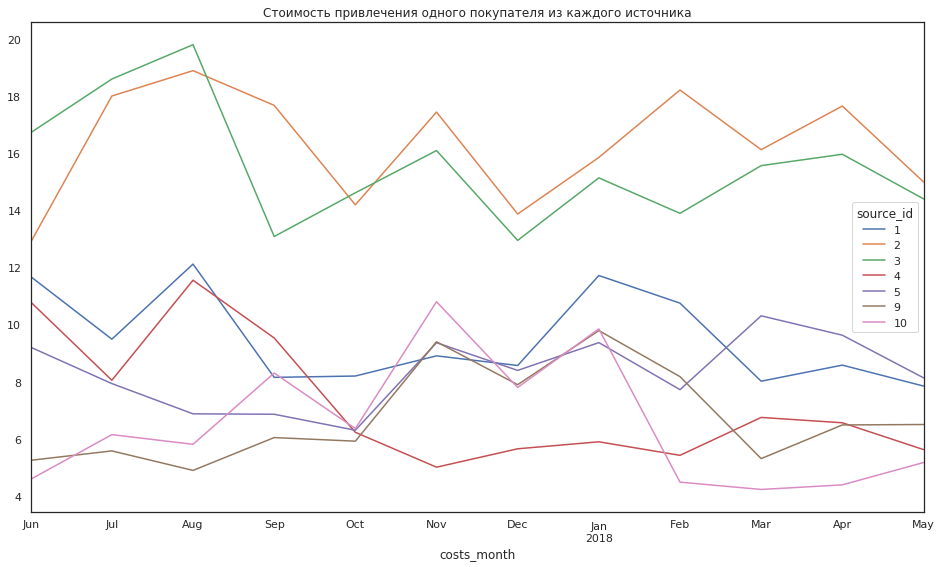

In [182]:
costs_.pivot_table(index=['costs_month'], columns='source_id', values='costs_per_buyer', aggfunc='mean').plot(
    figsize=(16,9), title='Стоимость привлечения одного покупателя из каждого источника')
plt.show()                      

### Маркетинг: На сколько окупились расходы? (ROI) <a class="anchor" id="roi"></a>

Посмотрим разбивку по визитам на примере одно из пользователей, видим, что на сайт он пришел с двух источников - 2 и 1. Будем рассчитывать, основываясь на источнике для первого визита

In [183]:
visits.query('Uid == 8056418121947262981').sort_values('Start Ts').head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_day,session_week,session_month,session_duration,visit_day,visit_week,visit_month,session_duration_sec,first_visit,first_visit_month,lifetime
181,desktop,2017-06-04 14:21:00,2,2017-06-04 14:17:00,8056418121947262981,2017,2017-06-04,22,6,00:04:00,2017-06-04,2017-06-01,2017-06-01,240,2017-06-04 14:17:00,2017-06-01,0
412,desktop,2017-06-04 18:05:00,1,2017-06-04 17:57:00,8056418121947262981,2017,2017-06-04,22,6,00:08:00,2017-06-04,2017-06-01,2017-06-01,480,2017-06-04 14:17:00,2017-06-01,0
316,desktop,2017-06-05 16:58:00,1,2017-06-05 16:40:00,8056418121947262981,2017,2017-06-05,23,6,00:18:00,2017-06-05,2017-06-01,2017-06-01,1080,2017-06-04 14:17:00,2017-06-01,0
155,desktop,2017-06-06 11:19:00,1,2017-06-06 10:54:00,8056418121947262981,2017,2017-06-06,23,6,00:25:00,2017-06-06,2017-06-01,2017-06-01,1500,2017-06-04 14:17:00,2017-06-01,0
176,desktop,2017-06-06 17:15:00,1,2017-06-06 16:10:00,8056418121947262981,2017,2017-06-06,23,6,01:05:00,2017-06-06,2017-06-01,2017-06-01,3900,2017-06-04 14:17:00,2017-06-01,0


Отсортируем датафрейм visits по стартам сессий и сгруппируем уникальные айди (уже делали это при расчете LTV, сделаем еще раз)

In [184]:
df_users = visits.sort_values('Start Ts').groupby('Uid').first()

In [185]:
df_users

,Device,End Ts,Source Id,Start Ts,session_year,session_day,session_week,session_month,session_duration,visit_day,visit_week,visit_month,session_duration_sec,first_visit,first_visit_month,lifetime
Uid,,,,,,,,,,,,,,,,
11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018,2018-03-01,9,3,00:06:00,2018-03-01,2018-03-01,2018-03-01,360,2018-03-01 17:27:00,2018-03-01,0
49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018,2018-02-06,6,2,00:02:00,2018-02-06,2018-02-01,2018-02-01,120,2018-02-06 15:55:00,2018-02-01,0
297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017,2017-06-07,23,6,00:01:00,2017-06-07,2017-06-01,2017-06-01,60,2017-06-07 18:47:00,2017-06-01,0
313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,2017-09-18,38,9,00:18:00,2017-09-18,2017-09-14,2017-09-01,1080,2017-09-18 22:49:00,2017-09-01,0
325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,2017,2017-09-30,39,9,00:09:00,2017-09-30,2017-09-28,2017-09-01,540,2017-09-30 14:29:00,2017-09-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446403737806311543,desktop,2017-11-30 03:39:00,5,2017-11-30 03:36:00,2017,2017-11-30,48,11,00:03:00,2017-11-30,2017-11-30,2017-11-01,180,2017-11-30 03:36:00,2017-11-01,0
18446424184725333426,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,2017,2017-12-06,49,12,00:00:00,2017-12-06,2017-11-30,2017-12-01,0,2017-12-06 20:32:00,2017-12-01,0
18446556406699109058,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,2018,2018-01-01,1,1,00:02:00,2018-01-01,2017-12-28,2018-01-01,120,2018-01-01 16:29:00,2018-01-01,0


Cоздадим новый датафрейм

In [186]:
client = pd.merge(orders, df_users[['Source Id']], on='Uid', how='left')

In [187]:
client.head()

,Buy Ts,Revenue,Uid,order_month,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3


Рассчитаем для каждого клиента дату его первой покупки

In [188]:
client['first_order_ts'] = client.groupby('Uid')['Buy Ts'].transform('min')

In [189]:
client['first_order_month'] = client['first_order_ts'].astype('datetime64[M]')

In [190]:
client.head()

,Buy Ts,Revenue,Uid,order_month,Source Id,first_order_ts,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01 07:58:00,2017-06-01


Рассчитаем количество уникальных uid в разрезе когорт и источника

In [191]:
cohort_sources_sizes = client.groupby(['first_order_month', 'Source Id']).agg({'Uid': 'nunique'}).reset_index()

In [192]:
cohort_sources_sizes.columns = ['first_order_month', 'Source Id', 'n_buyers']

In [193]:
cohort_sources_sizes.columns = ['first_order_month', 'source_id', 'n_buyers']

Количество людей, которые купили впервые в этом месяце и пришли из конкретного источника трафика

In [194]:
cohort_sources_sizes.head()

,first_order_month,source_id,n_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Рассчитаем сумму выручки в разрезе когорт, месяца покупки и источника

In [195]:
source_cohorts = client.groupby(['first_order_month', 'order_month', 'Source Id']).agg({'Revenue': 'sum'}).reset_index()

In [196]:
source_cohorts.head(12)

,first_order_month,order_month,Source Id,Revenue
0,2017-06-01,2017-06-01,1,1378.70
1,2017-06-01,2017-06-01,2,1043.68
2,2017-06-01,2017-06-01,3,2804.34
3,2017-06-01,2017-06-01,4,1959.84
4,2017-06-01,2017-06-01,5,1898.89
5,2017-06-01,2017-06-01,9,242.69
6,2017-06-01,2017-06-01,10,229.35
7,2017-06-01,2017-07-01,1,414.98
8,2017-06-01,2017-07-01,2,115.54
9,2017-06-01,2017-07-01,3,71.97


In [197]:
source_cohorts.columns = ['first_order_month', 'order_month','source_id', 'Revenue']

Склеиваем датафреймы по месяцу первой покупки и источнику трафика

In [198]:
source_report = pd.merge(cohort_sources_sizes, source_cohorts,on = ['first_order_month', 'source_id'])

In [199]:
source_report.head(10)

,first_order_month,source_id,n_buyers,order_month,Revenue
0,2017-06-01,1,190,2017-06-01,1378.70
1,2017-06-01,1,190,2017-07-01,414.98
2,2017-06-01,1,190,2017-08-01,419.43
3,2017-06-01,1,190,2017-09-01,714.24
4,2017-06-01,1,190,2017-10-01,811.20
5,2017-06-01,1,190,2017-11-01,389.34
6,2017-06-01,1,190,2017-12-01,490.48
7,2017-06-01,1,190,2018-01-01,479.23
8,2017-06-01,1,190,2018-02-01,432.15
9,2017-06-01,1,190,2018-03-01,316.30


Вычисляем возраст когорт

In [200]:
source_report['age'] = ((source_report['order_month'] - source_report['first_order_month']) / np.timedelta64(1,'M')).round().astype('int')

In [201]:
source_report['ltv'] = source_report.Revenue / source_report.n_buyers

In [202]:
source_report.head(15)

,first_order_month,source_id,n_buyers,order_month,Revenue,age,ltv
0,2017-06-01,1,190,2017-06-01,1378.70,0,7.256316
1,2017-06-01,1,190,2017-07-01,414.98,1,2.184105
2,2017-06-01,1,190,2017-08-01,419.43,2,2.207526
3,2017-06-01,1,190,2017-09-01,714.24,3,3.759158
4,2017-06-01,1,190,2017-10-01,811.20,4,4.269474
5,2017-06-01,1,190,2017-11-01,389.34,5,2.049158
6,2017-06-01,1,190,2017-12-01,490.48,6,2.581474
7,2017-06-01,1,190,2018-01-01,479.23,7,2.522263
8,2017-06-01,1,190,2018-02-01,432.15,8,2.274474
9,2017-06-01,1,190,2018-03-01,316.30,9,1.664737


Создадим сводную таблицу накопительного ltv по когортам, источнику и возрасту когорты

In [203]:
source_ltv = source_report.pivot_table(
  index=['first_order_month', 'source_id'],
  columns = 'age',
  values = 'ltv',
  aggfunc='sum'
).cumsum(axis=1)

Фрагмент LTV по всем месяцам по источникам

In [204]:
source_ltv

age                                0         1          2          3   \
first_order_month source_id                                             
2017-06-01        1          7.256316  9.440421  11.647947  15.407105   
                  2          4.441191  4.932851   5.204766   7.129660   
                  3          4.395517  4.508323   4.694734   5.005940   
                  4          4.745375  4.785714   4.956586   5.416005   
                  5          4.945026  5.847969   6.297266   7.170000   
...                               ...       ...        ...        ...   
2018-05-01        4          4.729988       NaN        NaN        NaN   
                  5          4.213360       NaN        NaN        NaN   
                  9          3.717500       NaN        NaN        NaN   
                  10         3.622231       NaN        NaN        NaN   
2018-06-01        4          3.420000       NaN        NaN        NaN   

age                                 4          5          6          7   \
first_order_month source_id                                               
2017-06-01        1          19.676579  21.725737  24.307211  26.829474   
                  2           8.796468   9.715447  11.317660  12.799787   
                  3           5.191646   5.384875   5.512790   5.542398   
                  4           6.564431   8.053317   9.482639   9.715738   
                  5           7.833307   8.131042   9.036380   9.623464   
...                                ...        ...        ...        ...   
2018-05-01        4                NaN        NaN        NaN        NaN   
                  5                NaN        NaN        NaN        NaN   
                  9                NaN        NaN        NaN        NaN   
                  10               NaN        NaN        NaN        NaN   
2018-06-01        4                NaN        NaN        NaN        NaN   

age                                 8          9          10         11  
first_order_month source_id                                              
2017-06-01        1          29.103947  30.768684  31.973526  33.644158  
                  2          14.135106  14.868809  16.227404  16.660681  
                  3           5.592445   5.645486   5.673652   5.705831  
                  4           9.932300  10.734939  12.003898  12.088789  
                  5          10.181849  11.127422  11.283464  11.400104  
...                                ...        ...        ...        ...  
2018-05-01        4                NaN        NaN        NaN        NaN  
                  5                NaN        NaN        NaN        NaN  
                  9                NaN        NaN        NaN        NaN  
                  10               NaN        NaN        NaN        NaN  
2018-06-01        4                NaN        NaN        NaN        NaN  

[86 rows x 12 columns]

LTV июньской когорты 2017 года по источникам

In [205]:
source_ltv.loc['2017-06-01'].fillna('')

age                                0         1        2        3        4   \
first_order_month source_id                                                  
2017-06-01        1          7.256316  9.440421  11.6479  15.4071  19.6766   
                  2          4.441191  4.932851  5.20477  7.12966  8.79647   
                  3          4.395517  4.508323  4.69473  5.00594  5.19165   
                  4          4.745375  4.785714  4.95659    5.416  6.56443   
                  5          4.945026  5.847969  6.29727     7.17  7.83331   
                  9          3.568971  3.640735  4.22868  4.83588  5.10338   
                  10         2.414211  2.530632                              

age                               5        6        7          8        9   \
first_order_month source_id                                                  
2017-06-01        1          21.7257  24.3072  26.8295  29.103947  30.7687   
                  2          9.71545  11.3177  12.7998  14.135106  14.8688   
                  3          5.38487  5.51279   5.5424   5.592445  5.64549   
                  4          8.05332  9.48264  9.71574   9.932300  10.7349   
                  5          8.13104  9.03638  9.62346  10.181849  11.1274   
                  9          5.54603  6.07794  6.20191   6.739559   6.8625   
                  10                                     2.539579            

age                               10       11  
first_order_month source_id                    
2017-06-01        1          31.9735  33.6442  
                  2          16.2274  16.6607  
                  3          5.67365  5.70583  
                  4          12.0039  12.0888  
                  5          11.2835  11.4001  
                  9          6.94338           
                  10

Для этого месяца есть раскрытие по всем источникам трафика

Для 6го месяца посчитаем средний LTV

In [206]:
ltv_source = source_ltv.reset_index().groupby(['source_id'])[5].mean().reset_index()

In [207]:
ltv_source.columns = ['Source Id', 'ltv_6m']

In [208]:
ltv_source

,Source Id,ltv_6m
0,1,12.011587
1,2,15.491555
2,3,5.730149
3,4,6.032379
4,5,9.345449
5,7,NaN
6,9,5.815051
7,10,3.930334


In [209]:
costs_by_sources = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

In [210]:
costs_by_sources

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [211]:
clients = pd.merge(orders, df_users['Source Id'], on='Uid', how='left')

In [212]:
clients.columns = ['Buy Ts', 'revenue', 'Uid', 'order_month', 'source_id']

In [213]:
source_cohort_sizes = clients.groupby(['order_month', 'source_id']).agg({'Uid':'nunique'}).reset_index()

In [214]:
revenue_by_sources = clients.groupby('source_id').agg({'revenue':'sum'})

In [215]:
revenue_by_sources

,revenue
source_id,
1,31090.55
2,46923.61
3,54511.24
4,56696.83
5,52624.02
7,1.22
9,5759.40
10,4450.33


Посчитаем ROMI по источникам

In [216]:
romi_source_total = revenue_by_sources.merge(costs_by_sources, on='source_id')

In [217]:
romi_source_total

,source_id,revenue,costs
0,1,31090.55,20833.27
1,2,46923.61,42806.04
2,3,54511.24,141321.63
3,4,56696.83,61073.60
4,5,52624.02,51757.10
5,9,5759.40,5517.49
6,10,4450.33,5822.49


In [218]:
romi_source_total['ROMI'] = (romi_source_total['revenue'] / romi_source_total['costs']).round(2)

In [219]:
romi_source_total

,source_id,revenue,costs,ROMI
0,1,31090.55,20833.27,1.49
1,2,46923.61,42806.04,1.10
2,3,54511.24,141321.63,0.39
3,4,56696.83,61073.60,0.93
4,5,52624.02,51757.10,1.02
5,9,5759.40,5517.49,1.04
6,10,4450.33,5822.49,0.76


Получаем, что самые окупаемые источники это 1,2,5,9.

Text(0, 0.5, 'ROMI')

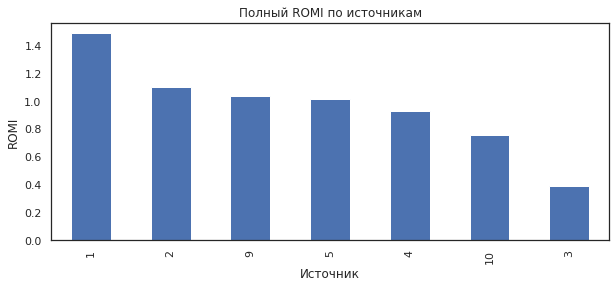

In [220]:
romi_source_total\
.sort_values(by='ROMI', ascending=False)\
.plot(kind='bar', x='source_id', y='ROMI', figsize=(10, 4), grid=False, legend=False)
plt.title('Полный ROMI по источникам')
plt.xlabel('Источник')
plt.ylabel('ROMI')

### Выводы и рекомендации<a class="anchor" id="summary"></a>

### Определите источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему<a class="anchor" id="market_sense"></a>

При выделении перспективных источников трафика я опиралась на таблицу, которая есть в проекте; она содержит цифры по ROMI, расходам (costs) и выручке (revenue). 
Лидером по обощенным показателям стал источник №1: у него самый большой ROMI (1,49), относительно небольшие расходы - 20,8. Также можно работать с источником №2: выручка у него больше расходов + относительно высокий ROMI (1,1).
Источник №3, наоборот, выглядит самым бесперспективным: у него самый низкий ROMI (0,39) при самых высоких расходах (141,3).
Возможно, мы сделали бы корректировку перспективных источников, если бы знали какого они вида (в проекте они обезличены) и возможно, как-то их объединяли или компоновали для большей эффективности рекламы.

### Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции<a class="anchor" id="market_summary"></a>

В этом проекте мы анализировали маркетинговые данные Яндекс.Афиши, цель этого анализа состояла в том, чтобы помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Сначала мы выгрузили данные и проверили данные на предмет пропусков и неверных типов данных. Пропусков в данных не было; а там, где это было нужно, мы поменяли формат данных на подходящий для дальнейшей работы.

Далее мы рассчитывали  три вида метрик: маркетинговые, продуктовые и метрики электронной коммерции.
В числе продуктовых метрик мы рассчитали показатели пользовательской активности – DAU, WAU, MAU. Сайт Яндекс.Афиши посещают 907 уникальных пользователей в день, 5 716 уникальных пользователей в неделю, 23 228 уникальных пользователей в месяц.

После снижения количества пользователей в августе 2017 начинается рост, который достигает пика в октябре и потом следующего пика  - в ноябре 2018 (покупка билетов на новогодние мероприятия и мероприятия в новогодние праздники?, потом опять начинается падение с отдельными периодами роста в феврале и марте (покупка билетов на мероприятия в районе гендерных праздников?) и затем уверенный спад активности в апреле 2018. То есть, есть определенная сезонность в уровне активности пользователей.

В месяц один пользователь в среднем проводит в приложении максимум 1 сессию. Не сказать, что продукт используется регулярно. Пользовательская сессия длится в среднем 10,7 минут.

Далее мы провели когортный анализ для оценки основных событий, совершаемых пользователями: визиты на сайт, заказы, повторные визиты и тд. В результате расчета Retention Rate мы выяснили, люди возвращаются на сайт вновь, но их заметно меньше, по сравнению с нулевым месяцем: из 100% нулевого месяца в первом вернулись от 4,2% до 8,5% пользователей, а к концу года во всех когортах возвращается все меньше и меньше пользователей. Возможно, были выбраны неэффективные источники трафика или пользователи не сочли интересными мероприятия, размещенные на Яндекс.Афише и не вернулись на сайт снова.

Далее мы анализировали время между первым визитом и первой покупкой: в среднем между первым визитом и покупкой проходит 249 минут, медианное значение - 16 минут. То есть покупка происходит быстро и, видимо, она планировалась. Заход на сайт был целенаправленным. самое большое количество покупок было в декабре (перед Новым годом), так же пики были в марте(потом резкое падение к апрелю), в мае и рост в сентябре, закончившийся пиком в октябре.В среднем в день совершается 138 покупок, в неделю - 969, в месяц - 4200. Средний чек - от 4,1 до 5,8.
Средний LTV по когортам за 6 месяцев составил 7.969. Общая сумма расходов на привлечение клиентов составила 329131.62 у.е. Самая большая доля расходов приходится на источник №3, примерно одинаковый вклад (13-18%) - у источников №№4,5,2; самая маленькая доля расходов приходится на источники №№10,9 (1,76-1,67%). Самые большие расходы по времени были в декабре, а самые низкие - в августе.
Расходы на привлечение покупателей (САС) оказались самыми высокими в августовской когорте - 10,7; самые "дешевые" - из майской когорты -7,4. Средний САС на одного покупателя для всего проекта - 9,14. По показателю ROMI самые окупаемые источники это 1,2,5,9.

### Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов<a class="anchor" id="persp_cohorts"></a>

Я бы выделила 2 когорты как перспективные, причины выделения у них разные:
1. Июньскую когорту, так как она лидирует по среднему уровню Retention Rate - 6.5% на фоне других когорт. 
2. Сентябрьскую когорту, так как она к 4-му месяцу "жизни" начала приносить в 2 раза больше доходов (LTV), чем в свои первые месяцы "жизни" и также вдвое больше чем "ранние" когорты, например, июньская когорта, которую мы выделили выше как перспективную, проигрывает по этому показателю: она увеличила доход только к 7-му месяцу "жизни" 